# Project: Comparison of Temperature Data for Rosario, Argentina and Birmingham, UK, extended

In [1]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import ssl
import requests

%matplotlib inline

## Get Data

Data source: Open-Meteo (https://open-meteo.com/). Generated using Copernicus Climate Change Service information (2022). ERA5 data: Hersbach et al. (2018), doi: 10.24381/cds.adbb2d47. ERA5-Land data: Muñoz Sabater (2019), doi: 10.24381/cds.e2161bac. CERRA data: Schimanke et al. (accessed 2022-12-31), doi: 10.24381/cds.622a565a.

Rosario, Santa Fe, Argentine and Birmingham, West Midlands, UK

In [3]:
# API endpoints
endpoints = {
    'rosario_argentina': "https://archive-api.open-meteo.com/v1/archive?latitude=-32.95&longitude=-60.64&start_date=2022-04-01&end_date=2023-03-28&hourly=temperature_2m",
    'birmingham_uk':"https://archive-api.open-meteo.com/v1/archive?latitude=52.48&longitude=-1.90&start_date=2022-04-01&end_date=2023-04-01&hourly=temperature_2m,relativehumidity_2m,rain"
}

# Get data
raw_data = {}
for place, url in endpoints.items():
    response = requests.get(url)

    if response.status_code == 200:
        raw_data[place] = response.json()
        print(place)
        print(raw_data[place].keys())
    else:
        print(f"Error: {response.status_code}")

rosario_argentina
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])
birmingham_uk
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


## Clean and organize dataframe

In [4]:
for place, local_data in raw_data.items():
    print(f"{place}: {str(local_data['hourly'].keys())}\n")

rosario_argentina: dict_keys(['time', 'temperature_2m'])

birmingham_uk: dict_keys(['time', 'temperature_2m', 'relativehumidity_2m', 'rain'])



In [5]:
# Convert the dictionaries to DataFrames and merge them
df_rosario = pd.DataFrame(raw_data['rosario_argentina']['hourly'])
df_birmingham = pd.DataFrame(raw_data['birmingham_uk']['hourly'])

df_combined = pd.merge(df_rosario, df_birmingham, on='time', suffixes=('_rosario', '_birmingham'))


# Extract the time and temperature data into a new DataFrame
df_temp = df_combined[['time', 'temperature_2m_rosario', 'temperature_2m_birmingham']].copy()
df_temp.columns = ['time', 'temperature_rosario', 'temperature_birmingham']
df_temp.head()

,time,temperature_rosario,temperature_birmingham
0,2022-04-01T00:00,15.4,0.3
1,2022-04-01T01:00,15.0,0.2
2,2022-04-01T02:00,14.7,-0.1
3,2022-04-01T03:00,14.3,-0.4
4,2022-04-01T04:00,13.8,-0.5


In [6]:
# Drop rows with null values in the temperature columns
df_temp = df_temp.dropna(subset=['temperature_rosario', 'temperature_birmingham'])
df_temp.head()

,time,temperature_rosario,temperature_birmingham
0,2022-04-01T00:00,15.4,0.3
1,2022-04-01T01:00,15.0,0.2
2,2022-04-01T02:00,14.7,-0.1
3,2022-04-01T03:00,14.3,-0.4
4,2022-04-01T04:00,13.8,-0.5


## Graph the data

In [7]:
# Imports specific to this graph
import matplotlib.dates as mdates

In [8]:
# Convert the 'time' column to a Pandas datetime object and set it as the index
df_temp['time'] = pd.to_datetime(df_temp['time'])
df_temp = df_temp.set_index('time')

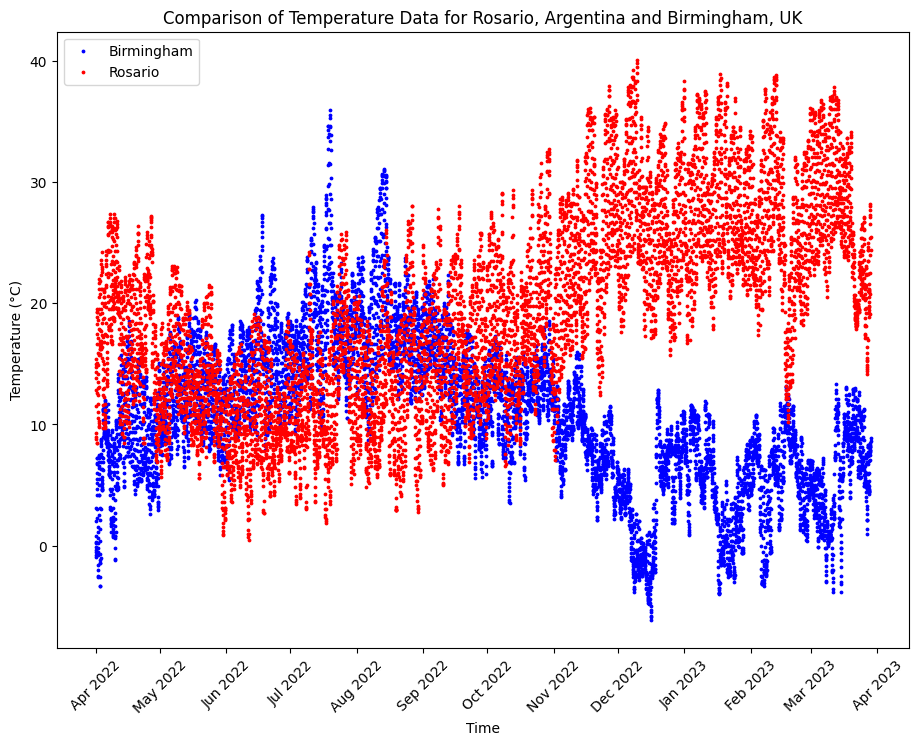

In [9]:
# Create a scatter plot of the temperature data
fig, ax = plt.subplots(figsize=(11, 8))
plt.scatter(df_temp.index, df_temp['temperature_birmingham'], c='blue', label='Birmingham', s=3)
plt.scatter(df_temp.index, df_temp['temperature_rosario'], c='red', label='Rosario', s=3)

# Set the x-axis ticks to monthly intervals
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


# Add axis labels and a title
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Temperature Data for Rosario, Argentina and Birmingham, UK')


# Get the current x-axis tick locations and labels
xticks = ax.get_xticks()
xlabels = ax.get_xticklabels()

# Rotate the tick labels by 45 degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Conclusions


The data suggests...